In [189]:
#dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [190]:
#read in train csv
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test_1.csv")
titanic_df = pd.concat([train_df,test_df], ignore_index = True)
titanic_df['title'] = titanic_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df = pd.get_dummies(titanic_df, columns=['Sex','Embarked','title'])
titanic_df = titanic_df.drop(columns=[
    'Name',
    'Ticket',
    'Cabin',
    'Age',
    'title_Major',
    'title_Rev',
    'title_Col',
    'title_Dr',
    'title_Jonkheer',
    'title_Ms',
    'title_Mme',
    'title_Mlle',
    'title_Lady',
    'title_Dona',
    'title_the Countess',
    'title_Sir',
    'title_Don',
    'title_Capt'
])
#titanic_df = titanic_df.drop(columns=['Sex_female'])
titanic_df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,1,0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,2,1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1
2,3,1,3,0,0,7.9250,1,0,0,0,1,0,1,0,0
3,4,1,1,1,0,53.1000,1,0,0,0,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1305,0,3,0,0,8.0500,0,1,0,0,1,0,0,1,0
1304,1306,1,1,0,0,108.9000,1,0,1,0,0,0,0,0,0
1305,1307,0,3,0,0,7.2500,0,1,0,0,1,0,0,1,0
1306,1308,0,3,0,0,8.0500,0,1,0,0,1,0,0,1,0


In [191]:
# RF ML Testing

# targets
target = titanic_df["Survived"]
target_names = ["survived", "died"]

#data
data = titanic_df
data = data.drop(columns=['Survived'])
data = data.drop(columns=['PassengerId'])
#data = data.drop(columns=['Sex_male'])

feature_names = data.columns

data.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,3,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,1,1,0,71.2833,1,0,1,0,0,0,0,0,1
2,3,0,0,7.9250,1,0,0,0,1,0,1,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1,0,0,1,0


In [192]:
#split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, train_size = .58)

In [193]:
from sklearn.preprocessing import MinMaxScaler
XScaler = MinMaxScaler().fit(X_train)
X_trainScaled = XScaler.transform(X_train)
X_testScaled = XScaler.transform(X_test)

In [194]:
# random forest set up
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
rf

RandomForestClassifier(n_estimators=50)

In [195]:
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)
rf = rf.fit(X_trainScaled, y_train)
rf.score(X_testScaled, y_test)

0.8563636363636363

In [196]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, data), reverse=True)

[(0.25287202252692426, 'Fare'),
 (0.22756802403901083, 'Sex_female'),
 (0.12802904232048248, 'Sex_male'),
 (0.12656594365892265, 'title_Mr'),
 (0.057095197935248816, 'SibSp'),
 (0.04562170363712257, 'Pclass'),
 (0.045331172379058655, 'title_Mrs'),
 (0.038458692733157204, 'title_Miss'),
 (0.0347926860921115, 'Parch'),
 (0.013043270349518899, 'Embarked_S'),
 (0.01222842814976297, 'title_Master'),
 (0.01086027480693297, 'Embarked_C'),
 (0.007533541371746244, 'Embarked_Q')]

In [198]:
predict_df = pd.read_csv("data/test.csv")
predict_df['title'] = predict_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
predict_df = pd.get_dummies(predict_df, columns=['Sex','Embarked','title'])
predict_df = predict_df.drop(columns=[
    'Name',
    'Ticket',
    'Cabin',
    'Age',
    'PassengerId',
    #'title_Major',
    'title_Rev',
    'title_Col',
    'title_Dr',
    #'title_Jonkheer',
    'title_Ms',
    #'title_Mme',
    #'title_Mlle',
    #'title_Lady',
    'title_Dona',
    #'title_the Countess',
    #'title_Sir',
    #'title_Don',
    #'title_Capt'
])
predict_df

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs
0,3,0,0,7.8292,0,1,0,1,0,0,0,1,0
1,3,1,0,7.0000,1,0,0,0,1,0,0,0,1
2,2,0,0,9.6875,0,1,0,1,0,0,0,1,0
3,3,0,0,8.6625,0,1,0,0,1,0,0,1,0
4,3,1,1,12.2875,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,0,0,1,0,0,1,0
414,1,0,0,108.9000,1,0,1,0,0,0,0,0,0
415,3,0,0,7.2500,0,1,0,0,1,0,0,1,0
416,3,0,0,8.0500,0,1,0,0,1,0,0,1,0


In [205]:
rf.predict(predict_df.head(150))

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# LR ML Testing

In [103]:
#train test split here  --look up docs on data split
#after split, which model to use  --random forest (supervised machine learning)
#deep learning another option




In [119]:
from sklearn.linear_model import LinearRegression
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### END SOLUTION

In [120]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [121]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5092579556644032
Testing Score: 0.5145233975351107


Text(0.5, 1.0, 'Residual Plot')

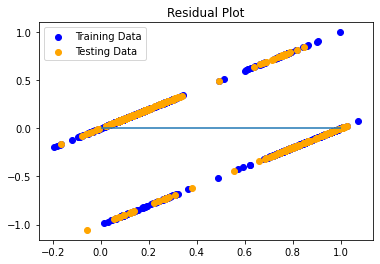

In [122]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [45]:
# #data cleaning

# #round ticket to 2 places
# titanic_data['Fare'] = titanic_data['Fare'].round(2)

# #adding numerical sex column so ML algorithm can recognize it
# titanic_data["Sex_Num"] = ""

# #adding numberical location column so ML algorithm can recognize it
# titanic_data["Location_Num"] = ""

# #drop lines for ticket id
# titanic_data = titanic_data.drop(titanic_data[titanic_data["Fare"] == 0].index)
    
# #turning Sex column into 0 = male and 1 = female
# titanic_data["Sex"] = titanic_data["Sex"].replace(["male"], 0)
# titanic_data["Sex"] = titanic_data["Sex"].replace(["female"], 1)

# #strip out titles (looking for non ms. mrs. or mr. titles)

# #display new DF
# titanic_data